In [54]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [55]:
##Image Augmentation 

train_datagen = ImageDataGenerator(
    rescale = 1./255, ##normalize
    rotation_range=10,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')

training_set = train_datagen.flow_from_directory(
        r"ASD\TrainTest\train",
        target_size=(300, 300),
        batch_size=16,
        class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255, rotation_range=10,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')
testing_set = test_datagen.flow_from_directory(
        r"ASD\TrainTest\test",
        target_size=(300, 300),
        batch_size=16,
        class_mode='binary')

training_set.class_indices


Found 391 images belonging to 2 classes.
Found 156 images belonging to 2 classes.


{'Control': 0, 'Patient': 1}

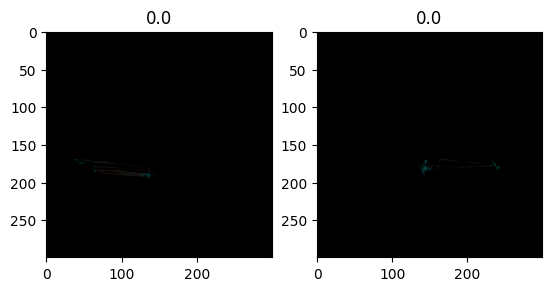

In [56]:
# get a batch of images and labels from the training set
images, labels = next(training_set)
# create a figure with 2x2 grid of subplots
fig, axes = plt.subplots(1, 2)

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title(labels[i])

# show the figure
plt.show()

In [57]:
##Defining the Network 
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation ='relu', input_shape=[300,300,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation ='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation ='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units= 256, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units= 1, activation = 'sigmoid'))

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [58]:
## Training
history = cnn.fit(x=training_set, validation_data=testing_set, epochs = 10)

Epoch 1/10
25/25 [==============================] - 17s 616ms/step - loss: 0.5817 - accuracy: 0.7008 - val_loss: 0.6526 - val_accuracy: 0.6090
Epoch 2/10
25/25 [==============================] - 15s 608ms/step - loss: 0.5267 - accuracy: 0.7187 - val_loss: 0.6000 - val_accuracy: 0.6795
Epoch 3/10
25/25 [==============================] - 14s 570ms/step - loss: 0.4910 - accuracy: 0.7621 - val_loss: 0.5897 - val_accuracy: 0.6667
Epoch 4/10
25/25 [==============================] - 14s 571ms/step - loss: 0.4527 - accuracy: 0.7928 - val_loss: 0.6060 - val_accuracy: 0.6795
Epoch 5/10
25/25 [==============================] - 15s 600ms/step - loss: 0.4481 - accuracy: 0.7980 - val_loss: 0.6342 - val_accuracy: 0.6474
Epoch 6/10
25/25 [==============================] - 15s 580ms/step - loss: 0.4447 - accuracy: 0.7954 - val_loss: 0.6293 - val_accuracy: 0.6538
Epoch 7/10
25/25 [==============================] - 14s 565ms/step - loss: 0.4053 - accuracy: 0.8184 - val_loss: 0.6914 - val_accuracy: 0.6282

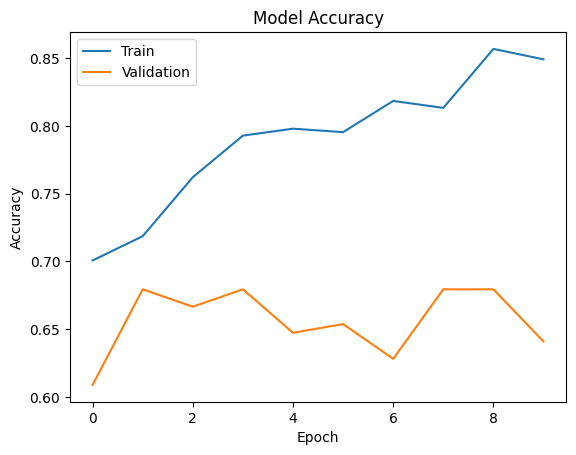

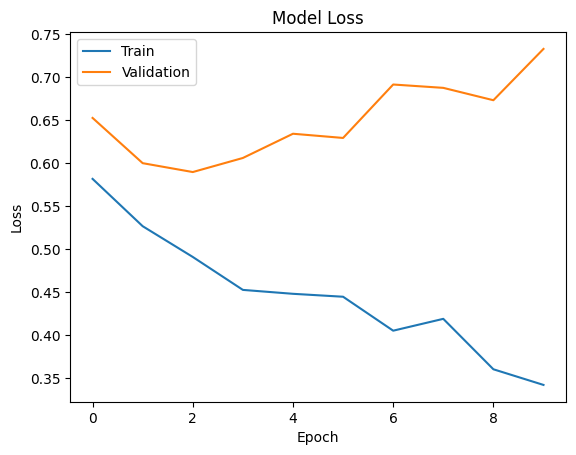

In [59]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()